# Example for loading the model build after feature selection
---


In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib as plt

from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, confusion_matrix

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [10]:
import sys

gdrive_project_root = '../' 
is_cloud = False

if 'google.colab' in sys.modules:
    is_cloud = True
    from google.colab import drive
    # define project root / change to match your path
    path_mv = "drive/MyDrive/01-Education/03-PhD/2021/Courses/HCI/hci_code/"
    path_mg = "drive/MyDrive/HCI/hci_code/"
    path_nj = ""

    # change to your private path
    gdrive_project_root = path_mv
    drive.mount('/content/drive', force_remount=True)  

In [11]:
X = pd.read_csv(gdrive_project_root  + 'data/processed/2nd_dataset/3_cls_model_input/X_top20_3cls.csv')
y = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_top20_3cls.csv')
X_train = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/X_top20_train_3cls.csv')
X_test = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/X_top20_test_3cls.csv')
y_train = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_top20_train_3cls.csv')
y_test = pd.read_csv(gdrive_project_root + 'data/processed/2nd_dataset/3_cls_model_input/y_top20_test_3cls.csv')

In [12]:
clf = joblib.load(gdrive_project_root + 'models/Feature_Selected_CLF_3classes_GBM-AASTR-ODG_RandomForest_100estimators_42_random_state.pkl')

In [13]:
predictions = clf.predict(X_test)
print("Model accuracy: %s \n" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Model accuracy: 0.79296875 

              precision    recall  f1-score   support

           1       0.83      0.96      0.89       177
           2       0.62      0.29      0.39        45
           3       0.67      0.59      0.62        34

    accuracy                           0.79       256
   macro avg       0.70      0.61      0.64       256
weighted avg       0.77      0.79      0.77       256



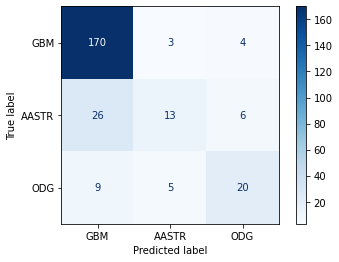

In [14]:
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues, display_labels=["GBM", "AASTR", "ODG"], values_format = '')

In [16]:
pd.DataFrame({'Feature': clf.feature_importances_}, index=X_test.columns).sort_values(by='Feature', ascending=False)


,Feature
Overall Survival (Months),0.343516
Diagnosis Age,0.299537
Mutation Count,0.177018
Overall Survival Status,0.038121
Sex,0.030935
TP53,0.026421
CIC,0.023499
Somatic Status,0.017790
EGFR,0.009234
NOTCH1,0.008833
